# Etude sur Decision Tree Classifier, Hyperparamètres et Botanique. Première partie.

## Importation des librairies

Pour l'analyse des donnée, nous aurons besoin de la librairie "pandas" pour lire et manipuler les fichiers; la librairie "numpy" pour tous ceux qui est calcul mathématiques; et la librairie "matplotlib.pyplot" et "seaborn"pour la visualisation de données.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## vérification de documentation de DecisionTreeClassifier

In [2]:
?DecisionTreeClassifier

## Chargement des fichiers et découverte des données

In [3]:
iris = datasets.load_iris(as_frame=True)

In [4]:
iris["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

J'ai vérifié des informations sur iris

Remarques :

'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

'feature_names': ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [5]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

## Traitement de données

Je crée d'abord une copie de menu avant toute modification (iris_mod).

In [6]:
iris_mod = iris.frame.copy()
iris_mod

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
iris_mod.iloc[0, 2]

1.4

In [8]:
iris_mod.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


J'ai vérifié des données par target. Il y a 3 targets ; 'setosa' = 0, 'versicolor' = 1, 'virginica' =2

In [9]:
iris_mod_0 = iris_mod[iris_mod['target']==0]

In [10]:
iris_mod_0.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [11]:
iris_mod_1 = iris_mod[iris_mod['target']==1]
iris_mod_1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [12]:
iris_mod_2 = iris_mod[iris_mod['target']==2]
iris_mod_2.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


### Mise au format Numpy des données

consigne de travail : Nous allons utiliser seulement les caractéristiques "petal length" et "petal width"

In [13]:
iris_mod_2fetures = iris_mod.iloc[:,2:-1]

In [14]:
X = iris_mod_2fetures.to_numpy()

In [15]:
X[:,0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [16]:
type(X)

numpy.ndarray

In [17]:
y= iris_mod.iloc[:,-1].to_numpy()

In [18]:
type(y)

numpy.ndarray

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## La corrélation entre les variables

In [20]:
cor = np.corrcoef(X[:,0],X[:,1])
print('correlation entre 2 features(petal length, petal width) : {0:.2f}%'.format(cor[0,1]))

correlation entre 2 features(petal length, petal width) : 0.96%


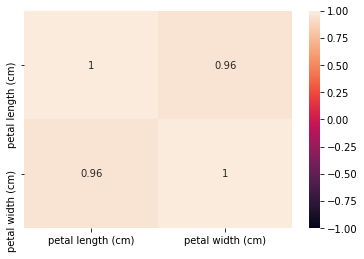

<Figure size 3600x3600 with 0 Axes>

In [21]:
c = iris_mod_2fetures.corr().round(2)
sns.heatmap(data = c, annot=True, vmin = -1.0, vmax = 1.0)
plt.figure(figsize = (50, 50))
plt.show()

Nous allons prendre 10 samples (random) pour etudier pour comprendre ses comportements et l'arbre de decision, l'impurété de Gini, CART

In [22]:
iris_simple = iris_mod_2fetures.sample(10)

In [23]:
iris_simple.sort_values('petal length (cm)')

,petal length (cm),petal width (cm)
13,1.1,0.1
36,1.3,0.2
8,1.4,0.2
4,1.4,0.2
48,1.5,0.2
80,3.8,1.1
53,4.0,1.3
96,4.2,1.3
55,4.5,1.3
135,6.1,2.3


## Afficher les données

<AxesSubplot:ylabel='count'>

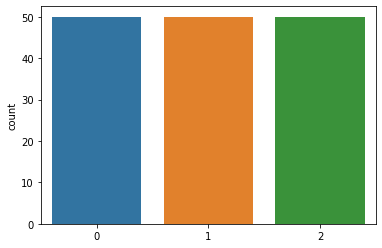

In [24]:
# データの件数を集計し、ヒストグラムとして出力
# La méthode seaborn.countplot agrège le nombre de données et le présente sous forme d'histogramme.
sns.countplot(x=y)

### Echantillonnage des données

In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


### Penser à s'assurer graphiquement de la bonne répartition des données

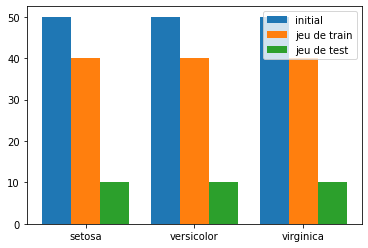

In [27]:
plt.hist([y, y_train, y_test], label=['initial', 'jeu de train', 'jeu de test'], bins=np.arange(4)-0.5)
plt.legend(loc='upper right')
plt.xticks([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
plt.show()

Nous constatons la bonne répartition des données

### Entrainer le modèle avec max_depth=2, puis max_depth=3 jusqu'à max_depth=10

J'ai d'abord entrainer le modèle avec max_depth=3

In [28]:
model = tree.DecisionTreeClassifier(random_state=42, max_depth=3)

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [30]:
score = model.score(X_train, y_train) 
print('Taux de classifiation (accuracy) for train: {0:.2f}%'.format(score * 100))

Taux de classifiation (accuracy) for train: 98.33%


In [31]:
# モデル設定と訓練データを使った学習
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3) # 決定木モデル（最大深さ3）
clf = clf.fit(X_train, y_train) # 訓練データで学習

In [32]:
# 訓練データでの正解率（学習検証）
from sklearn import metrics
predict_train = clf.predict(X_train)
ac_score = metrics.accuracy_score(y_train, predict_train)
print('Taux de classifiation (accuracy) for train: {0:.2f}%'.format(ac_score * 100))

Taux de classifiation (accuracy) for train: 98.33%


Ensuite, nous avons entrainé le modèle avec max_depth entre 2 et 10 avec boucle

In [33]:
scores_train = {}
scores_test = {}
for d in range(2,11):
    model = DecisionTreeClassifier(max_depth=d, random_state = 42)
    model.fit(X_train, y_train)
    scores_train[d] = model.score(X_train, y_train)
    scores_test[d] = model.score(X_test, y_test)

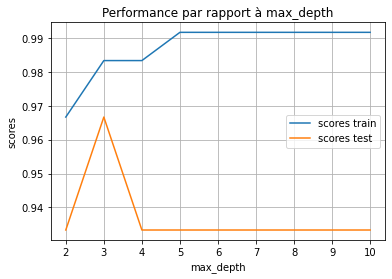

In [34]:
p1=plt.plot(scores_train.values())
p2=plt.plot(scores_test.values())
plt.title("Performance par rapport à max_depth")
plt.xlabel("max_depth")
plt.ylabel("scores")
plt.grid(True)
plt.xticks([0,1,2,3,4,5,6,7,8], list(scores_test.keys()))
plt.legend((p1[0],p2[0]),("scores train", "scores test"))
plt.show()

Remarques:
    
max_depth = 3 offre la meilleure performance pour les données de test.

Pour les données de train, nous constatons "surapprentissage" (overfitting) à partir de max_depth = 5

### afficher le modèle avec decision trees

Nous exportons l'arbre au format Graphviz en utilisant l'exportateur export_graphviz.

In [35]:
export_graphviz(model, out_file = 'tree1.dot', feature_names = iris_mod_2fetures.columns, class_names = ["0", "1", "2"], filled = True)

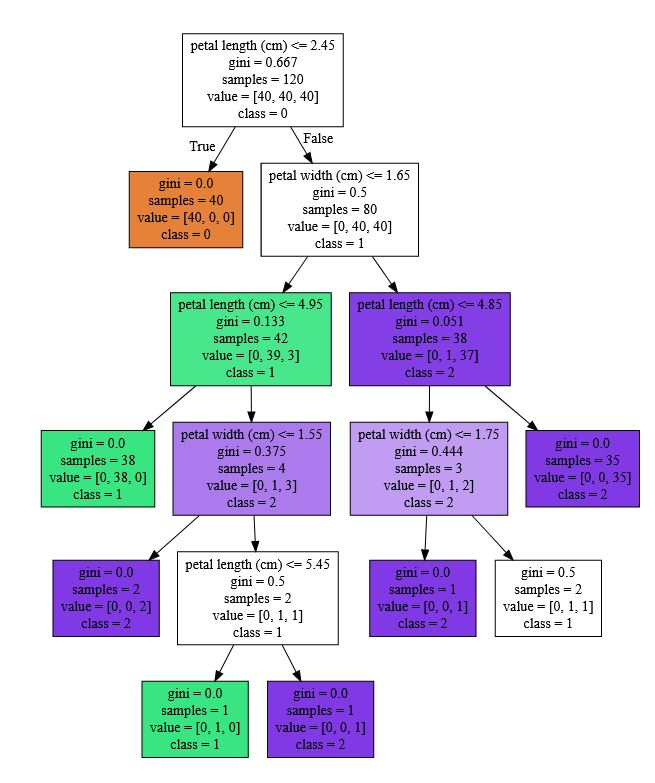

In [36]:
from IPython.display import Image 

Image("tree.jpg")

Je les ai affiché aussi avec tree.plot_tree(). C'est un function classique pour visualiser decision tree.

DecisionTreeClassifier(max_depth=2)


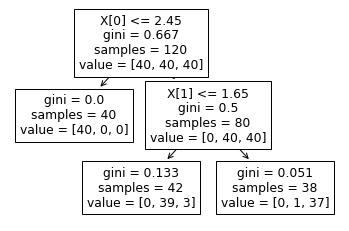

DecisionTreeClassifier(max_depth=3)


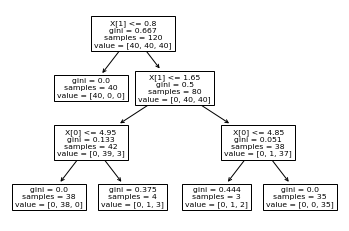

DecisionTreeClassifier(max_depth=4)


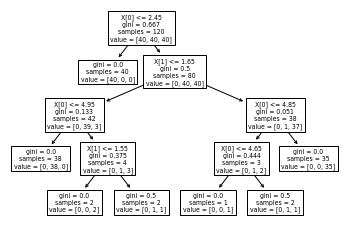

DecisionTreeClassifier(max_depth=5)


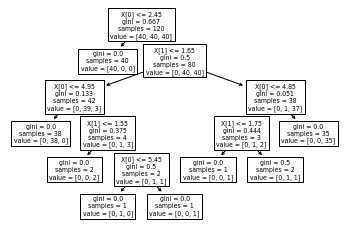

DecisionTreeClassifier(max_depth=6)


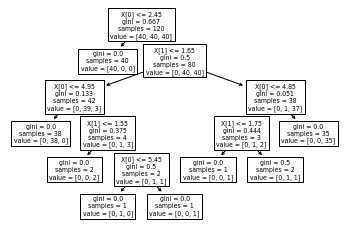

DecisionTreeClassifier(max_depth=7)


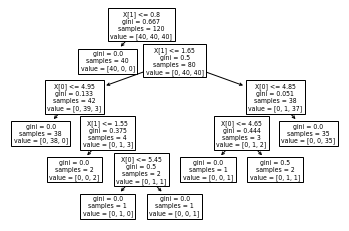

DecisionTreeClassifier(max_depth=8)


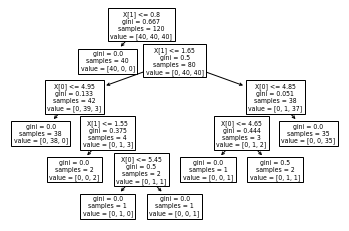

DecisionTreeClassifier(max_depth=9)


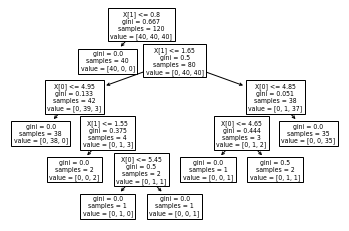

DecisionTreeClassifier(max_depth=10)


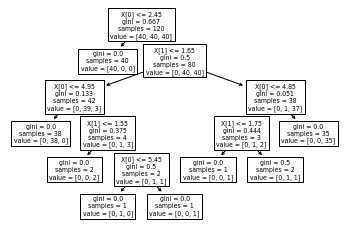

In [37]:
from sklearn import tree

for i in range(9):
    clf = tree.DecisionTreeClassifier(max_depth = i+2)
    clf = clf.fit(X_train, y_train)
    print(clf)
    tree.plot_tree(clf)   
    plt.show()

# Synthèse et Conclusion

Comme nous l'avons montré dans notre présentation, une profondeur d'arbre très importante n'augmente pas nécessairement la performance du modèle. Lorsqu'on atteint une pureté de 0 sur un sous-ensemble de samples, il ne sert à rien de splitter à nouveau les données.

Avec un random state de 42 et sans préciser stratify=y pour fabriquer notre jeu de tests, la performance sur ce dernier était meiilleure que sur le jeu d'entrainement (et même parfaite). Il est donc important de disposer de jeux d'entrainenement et de tests équilibrés.

Pour les données de test, max_depth = 3 offre la meilleure performance .

Pour les données de train, nous constatons "surapprentissage" (overfitting) à partir de max_depth = 5

# Annexe

## Impurity from Scratch

In [38]:
df = iris_mod
df['target'] = y
#df.sample(10)
ids = [12, 18, 24, 61, 66, 85, 125, 127, 138, 147]
df = df.iloc[ids]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
12,4.8,3.0,1.4,0.1,0
18,5.7,3.8,1.7,0.3,0
24,4.8,3.4,1.9,0.2,0
61,5.9,3.0,4.2,1.5,1
66,5.6,3.0,4.5,1.5,1
85,6.0,3.4,4.5,1.6,1
125,7.2,3.2,6.0,1.8,2
127,6.1,3.0,4.9,1.8,2
138,6.0,3.0,4.8,1.8,2
147,6.5,3.0,5.2,2.0,2


In [39]:
df.target = df.target.astype('category')

def gini(df, feat):
    gini_dict = {}
    # Creating an ordered Serie of all the values in feat column
    ordered_serie = df[feat].sort_values()
    # Iterating between all the possible splits of our serie (q - 1)
    for i in range(1,len(df)):
        left_counts = []
        right_counts = []
        left_gini = 0
        right_gini = 0
        # Splitting the data into a left and a right dataset
        left = ordered_serie[:i]
        right = ordered_serie[i:]
        # Getting values of the target for each sample
        left_ys = df.loc[left.index]['target'].values
        right_ys = df.loc[right.index]['target'].values
        # Counting the effectives of each class for the left and right datasets
        left_counts = left_ys.value_counts()
        right_counts = right_ys.value_counts()
        # Computing The Gini Impurity for left and right datasets
        left_gini = 1 - sum([(x/len(left))**2 for x in left_counts])
        right_gini = 1 - sum([(x/len(right))**2 for x in right_counts])
        gini_dict[i] = left_gini + right_gini
        best_split = min(gini_dict, key=gini_dict.get)

    print(gini_dict)
    print('---')
    print(f'best split at {best_split}')
        
    return gini_dict, best_split, ordered_serie[:best_split].index, ordered_serie[best_split:].index 


gini_dict, best_split, left_idx, right_idx = gini(df, 'petal length (cm)')
gini_dict, best_split, left_idx, right_idx = gini(df, 'petal width (cm)')

{1: 0.6419753086419753, 2: 0.59375, 3: 0.48979591836734704, 4: 0.8194444444444444, 5: 0.7999999999999998, 6: 0.5, 7: 0.6122448979591837, 8: 0.65625, 9: 0.6666666666666667}
---
best split at 3
{1: 0.6419753086419753, 2: 0.59375, 3: 0.48979591836734704, 4: 0.8194444444444444, 5: 0.7999999999999998, 6: 0.5, 7: 0.6122448979591837, 8: 0.65625, 9: 0.6666666666666667}
---
best split at 3


C:\Users\nante\anaconda3\envs\simplon\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Nous pouvons choisir n'importe quel des features pour notre premier noeud car leur impureté est la même.

In [40]:
dfl = df.loc[left_idx]
dfr = df.loc[right_idx]

gini_dict, best_split, left_idx, right_idx = gini(dfr, 'petal width (cm)')

{1: 0.4444444444444444, 2: 0.31999999999999984, 3: 0.0, 4: 0.375, 5: 0.48, 6: 0.5}
---
best split at 3


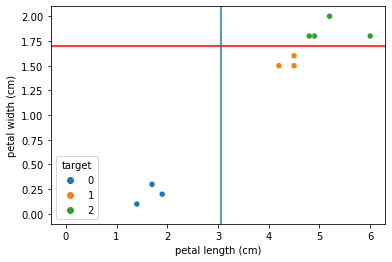

In [41]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df.target)
plt.axline((3.05,0),(3.05,2))
plt.axline((0,1.7),(6,1.7), color='red')
plt.savefig('partitions.png')